In [1]:
import import_ipynb
from utils import df_from_csv, df_pm25_to_df_aqi, plot_hist, plot_boxes, plot_lines, df_to_csv

importing Jupyter notebook from utils.ipynb
importing Jupyter notebook from aqi_epa_pm25.ipynb
PM2.5: 35.9, AQI: 102
PM2.5: 35.9, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 35.5, Max: 55.4
AQI: 102, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 101, Max: 150


## PM2.5 to AQI

In [2]:
# Load Raw Data
df_pm25_clean = df_from_csv("pm25_clean.csv", datafolder="1_clean")

# Check Data Types
print(df_pm25_clean.dtypes)

df_pm25_clean.head()

TANGARA_2BBA    float64
TANGARA_260A    float64
TANGARA_4B1A    float64
TANGARA_14D6    float64
TANGARA_1EE6    float64
TANGARA_2B42    float64
TANGARA_2FF6    float64
TANGARA_307A    float64
TANGARA_1712    float64
TANGARA_48C6    float64
TANGARA_532E    float64
TANGARA_F1AE    float64
TANGARA_06BE    float64
dtype: object


,TANGARA_2BBA,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_1EE6,TANGARA_2B42,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
DATETIME,,,,,,,,,,,,,
2023-10-06 19:23:30-05:00,8.0,11.0,25.0,11.0,NaN,7.0,11.0,12.0,28.0,8.0,5.0,10.0,0.0
2023-10-06 19:24:00-05:00,8.0,11.0,22.0,11.0,6.0,7.0,11.0,13.0,28.0,7.0,5.0,10.0,0.0
2023-10-06 19:24:30-05:00,8.0,11.0,24.0,11.0,NaN,7.0,11.0,12.0,27.0,7.0,6.0,10.0,0.0
2023-10-06 19:25:00-05:00,8.0,11.0,23.0,11.0,NaN,7.0,10.0,13.0,26.0,6.0,4.0,10.0,0.0
2023-10-06 19:25:30-05:00,9.0,NaN,24.0,10.0,6.0,8.0,10.0,13.0,25.0,5.0,6.0,10.0,0.0


## Descriptive Statistics

In [3]:
# Describe Data
df_pm25_clean.describe()

,TANGARA_2BBA,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_1EE6,TANGARA_2B42,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
count,10.000000,9.0,10.000000,8.000000,7.0,10.000000,10.000000,10.000000,9.000000,10.000000,10.000000,10.000000,10.0
mean,8.300000,11.0,22.400000,10.875000,6.0,7.600000,10.500000,12.100000,26.666667,6.800000,5.100000,10.600000,0.0
std,0.483046,0.0,1.577621,0.353553,0.0,0.699206,0.527046,0.737865,1.000000,0.918937,1.100505,0.699206,0.0
min,8.000000,11.0,20.000000,10.000000,6.0,7.000000,10.000000,11.000000,25.000000,5.000000,3.000000,10.000000,0.0
25%,8.000000,11.0,21.250000,11.000000,6.0,7.000000,10.000000,12.000000,26.000000,6.250000,4.250000,10.000000,0.0
50%,8.000000,11.0,22.000000,11.000000,6.0,7.500000,10.500000,12.000000,27.000000,7.000000,5.500000,10.500000,0.0
75%,8.750000,11.0,23.750000,11.000000,6.0,8.000000,11.000000,12.750000,27.000000,7.000000,6.000000,11.000000,0.0
max,9.000000,11.0,25.000000,11.000000,6.0,9.000000,11.000000,13.000000,28.000000,8.000000,6.000000,12.000000,0.0


## PM2.5 to AQI

In [4]:
# AQI DataFrame Sensors
df_aqi = df_pm25_to_df_aqi(df_pm25_clean)
df_aqi = df_aqi.astype('float')
df_aqi.head()

,TANGARA_2BBA,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_1EE6,TANGARA_2B42,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
DATETIME,,,,,,,,,,,,,
2023-10-06 19:23:30-05:00,34.0,46.0,79.0,46.0,NaN,30.0,46.0,50.0,85.0,34.0,21.0,42.0,0.0
2023-10-06 19:24:00-05:00,34.0,46.0,72.0,46.0,25.0,30.0,46.0,53.0,85.0,30.0,21.0,42.0,0.0
2023-10-06 19:24:30-05:00,34.0,46.0,77.0,46.0,NaN,30.0,46.0,50.0,83.0,30.0,25.0,42.0,0.0
2023-10-06 19:25:00-05:00,34.0,46.0,74.0,46.0,NaN,30.0,42.0,53.0,81.0,25.0,17.0,42.0,0.0
2023-10-06 19:25:30-05:00,38.0,NaN,77.0,42.0,25.0,34.0,42.0,53.0,79.0,21.0,25.0,42.0,0.0


## Describe Statistics

In [5]:
# Describe Data
df_aqi.describe()

,TANGARA_2BBA,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_1EE6,TANGARA_2B42,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
count,10.000000,9.0,10.000000,8.000000,7.0,10.000000,10.000000,10.000000,9.000000,10.000000,10.00000,10.000000,10.0
mean,35.200000,46.0,73.100000,45.500000,25.0,32.400000,44.000000,50.100000,82.333333,28.900000,21.40000,44.400000,0.0
std,1.932184,0.0,3.573047,1.414214,0.0,2.796824,2.108185,2.558211,2.000000,4.094712,4.40202,2.796824,0.0
min,34.000000,46.0,68.000000,42.000000,25.0,30.000000,42.000000,46.000000,79.000000,21.000000,13.00000,42.000000,0.0
25%,34.000000,46.0,70.500000,46.000000,25.0,30.000000,42.000000,50.000000,81.000000,26.250000,18.00000,42.000000,0.0
50%,34.000000,46.0,72.000000,46.000000,25.0,32.000000,44.000000,50.000000,83.000000,30.000000,23.00000,44.000000,0.0
75%,37.000000,46.0,76.250000,46.000000,25.0,34.000000,46.000000,52.250000,83.000000,30.000000,25.00000,46.000000,0.0
max,38.000000,46.0,79.000000,46.000000,25.0,38.000000,46.000000,53.000000,85.000000,34.000000,25.00000,50.000000,0.0


## Histograms

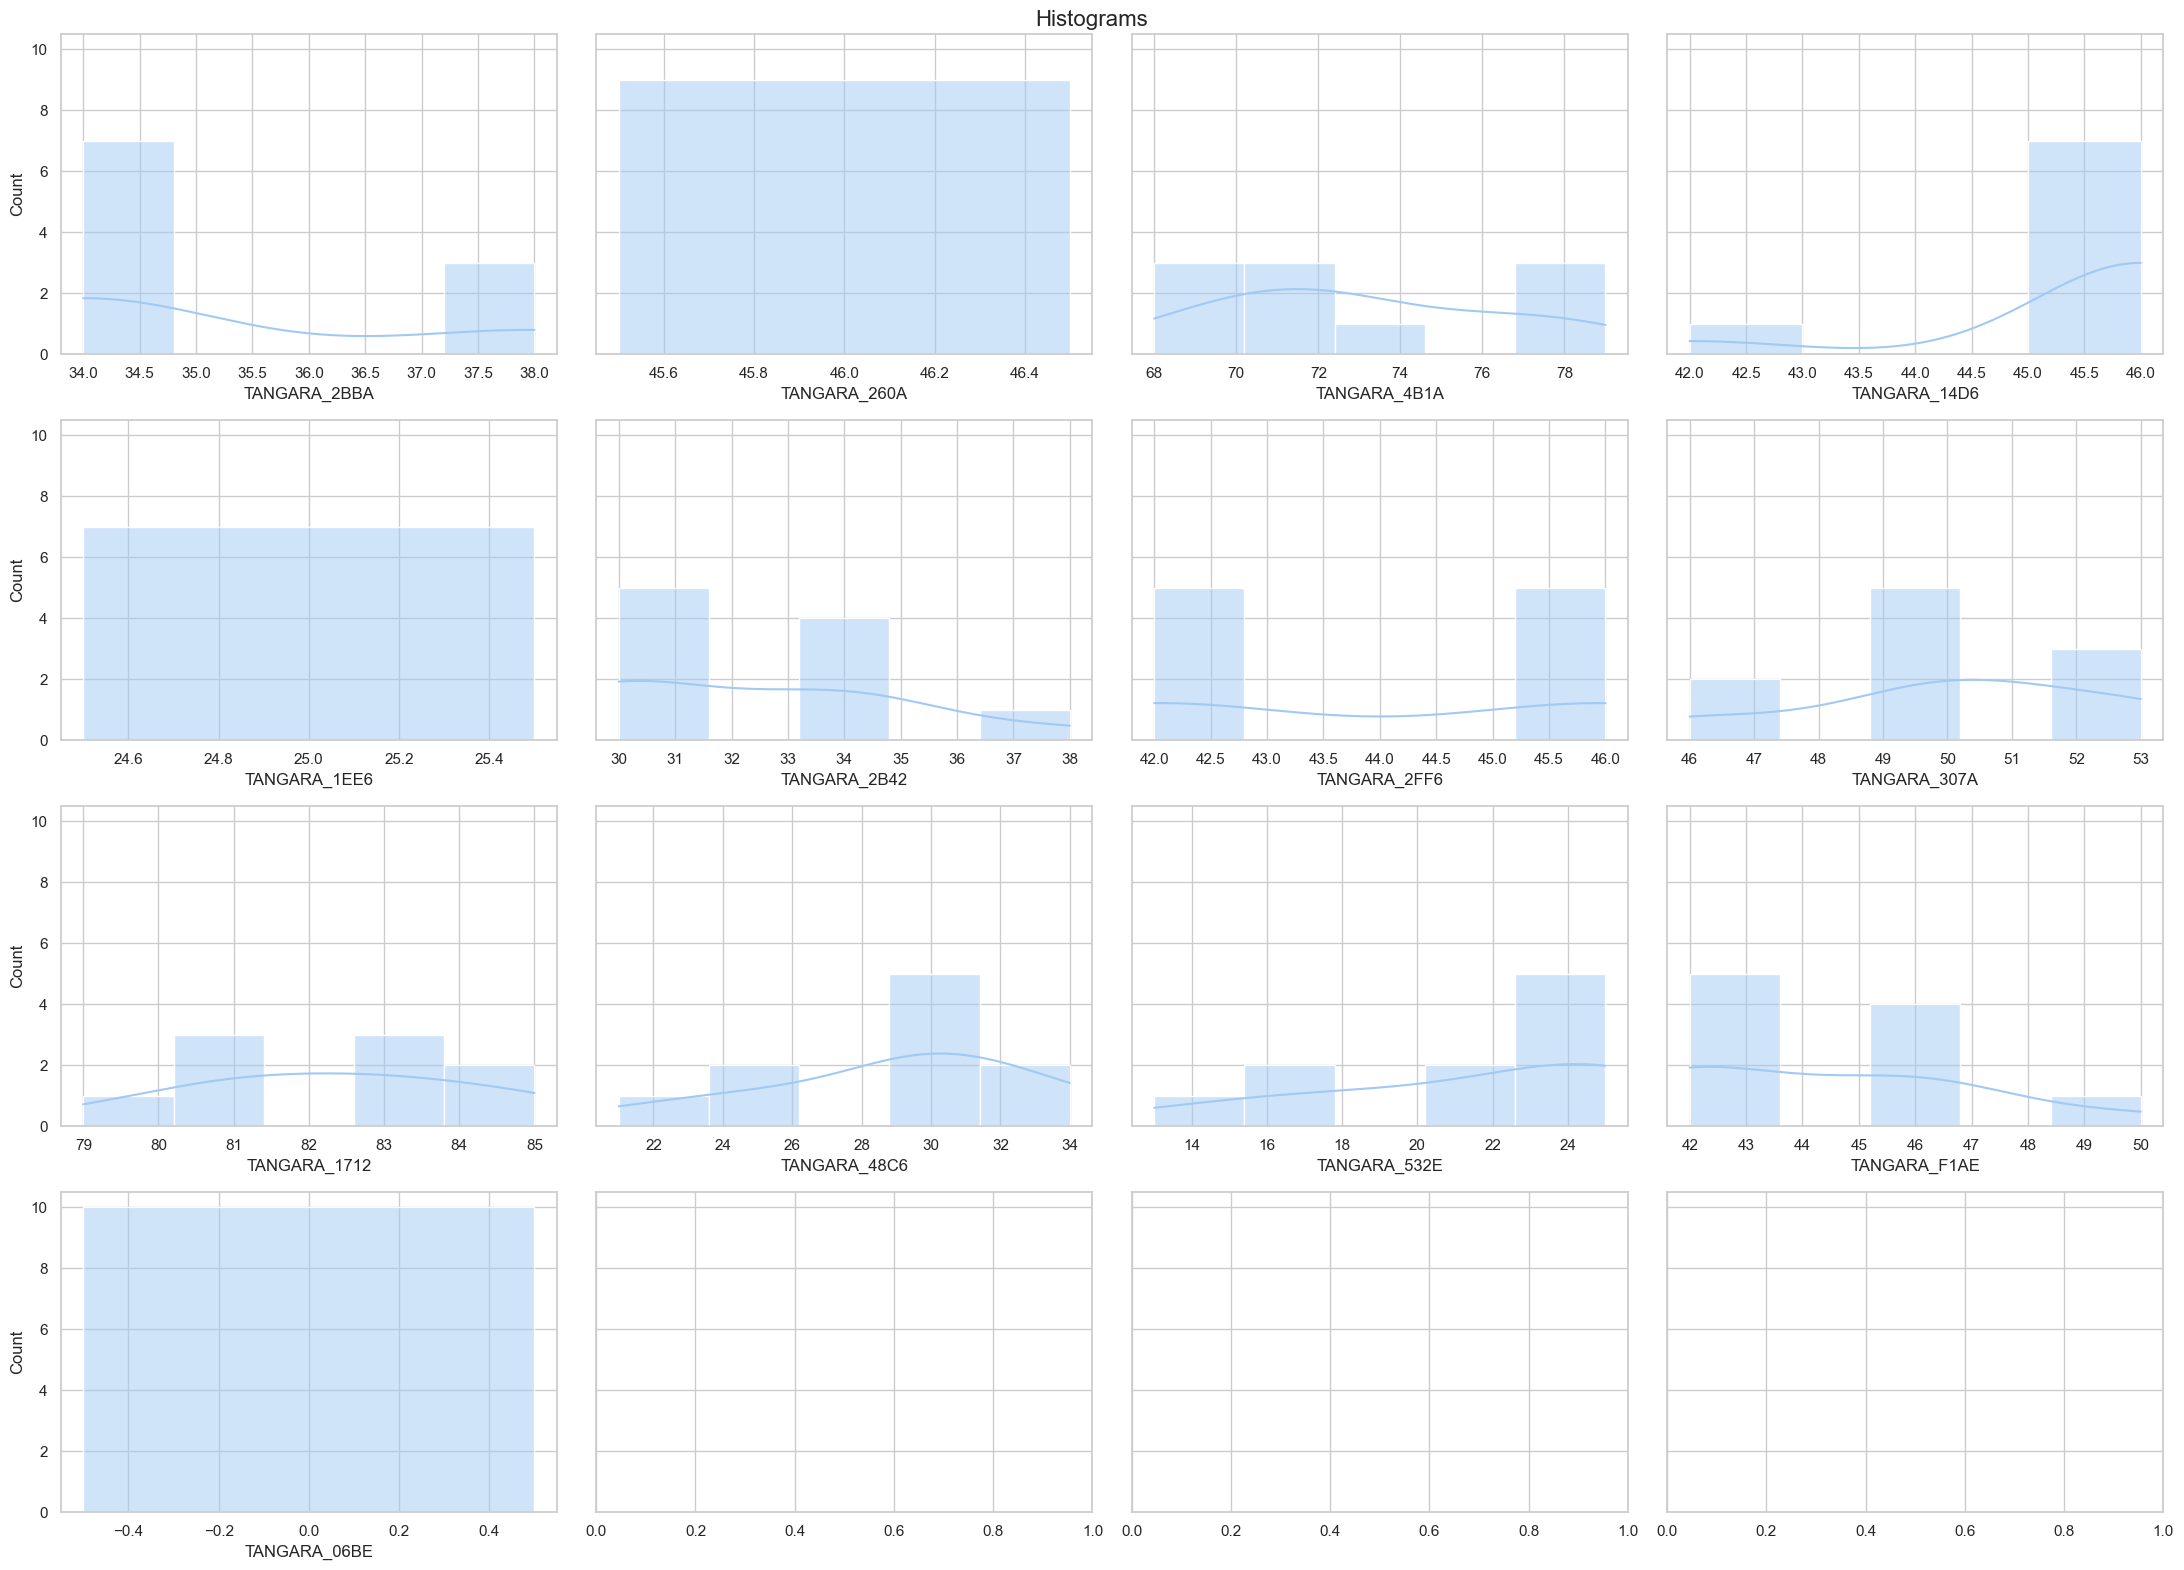

In [6]:
# Plot Histograms
plot_hist(df_aqi)

## Boxplots

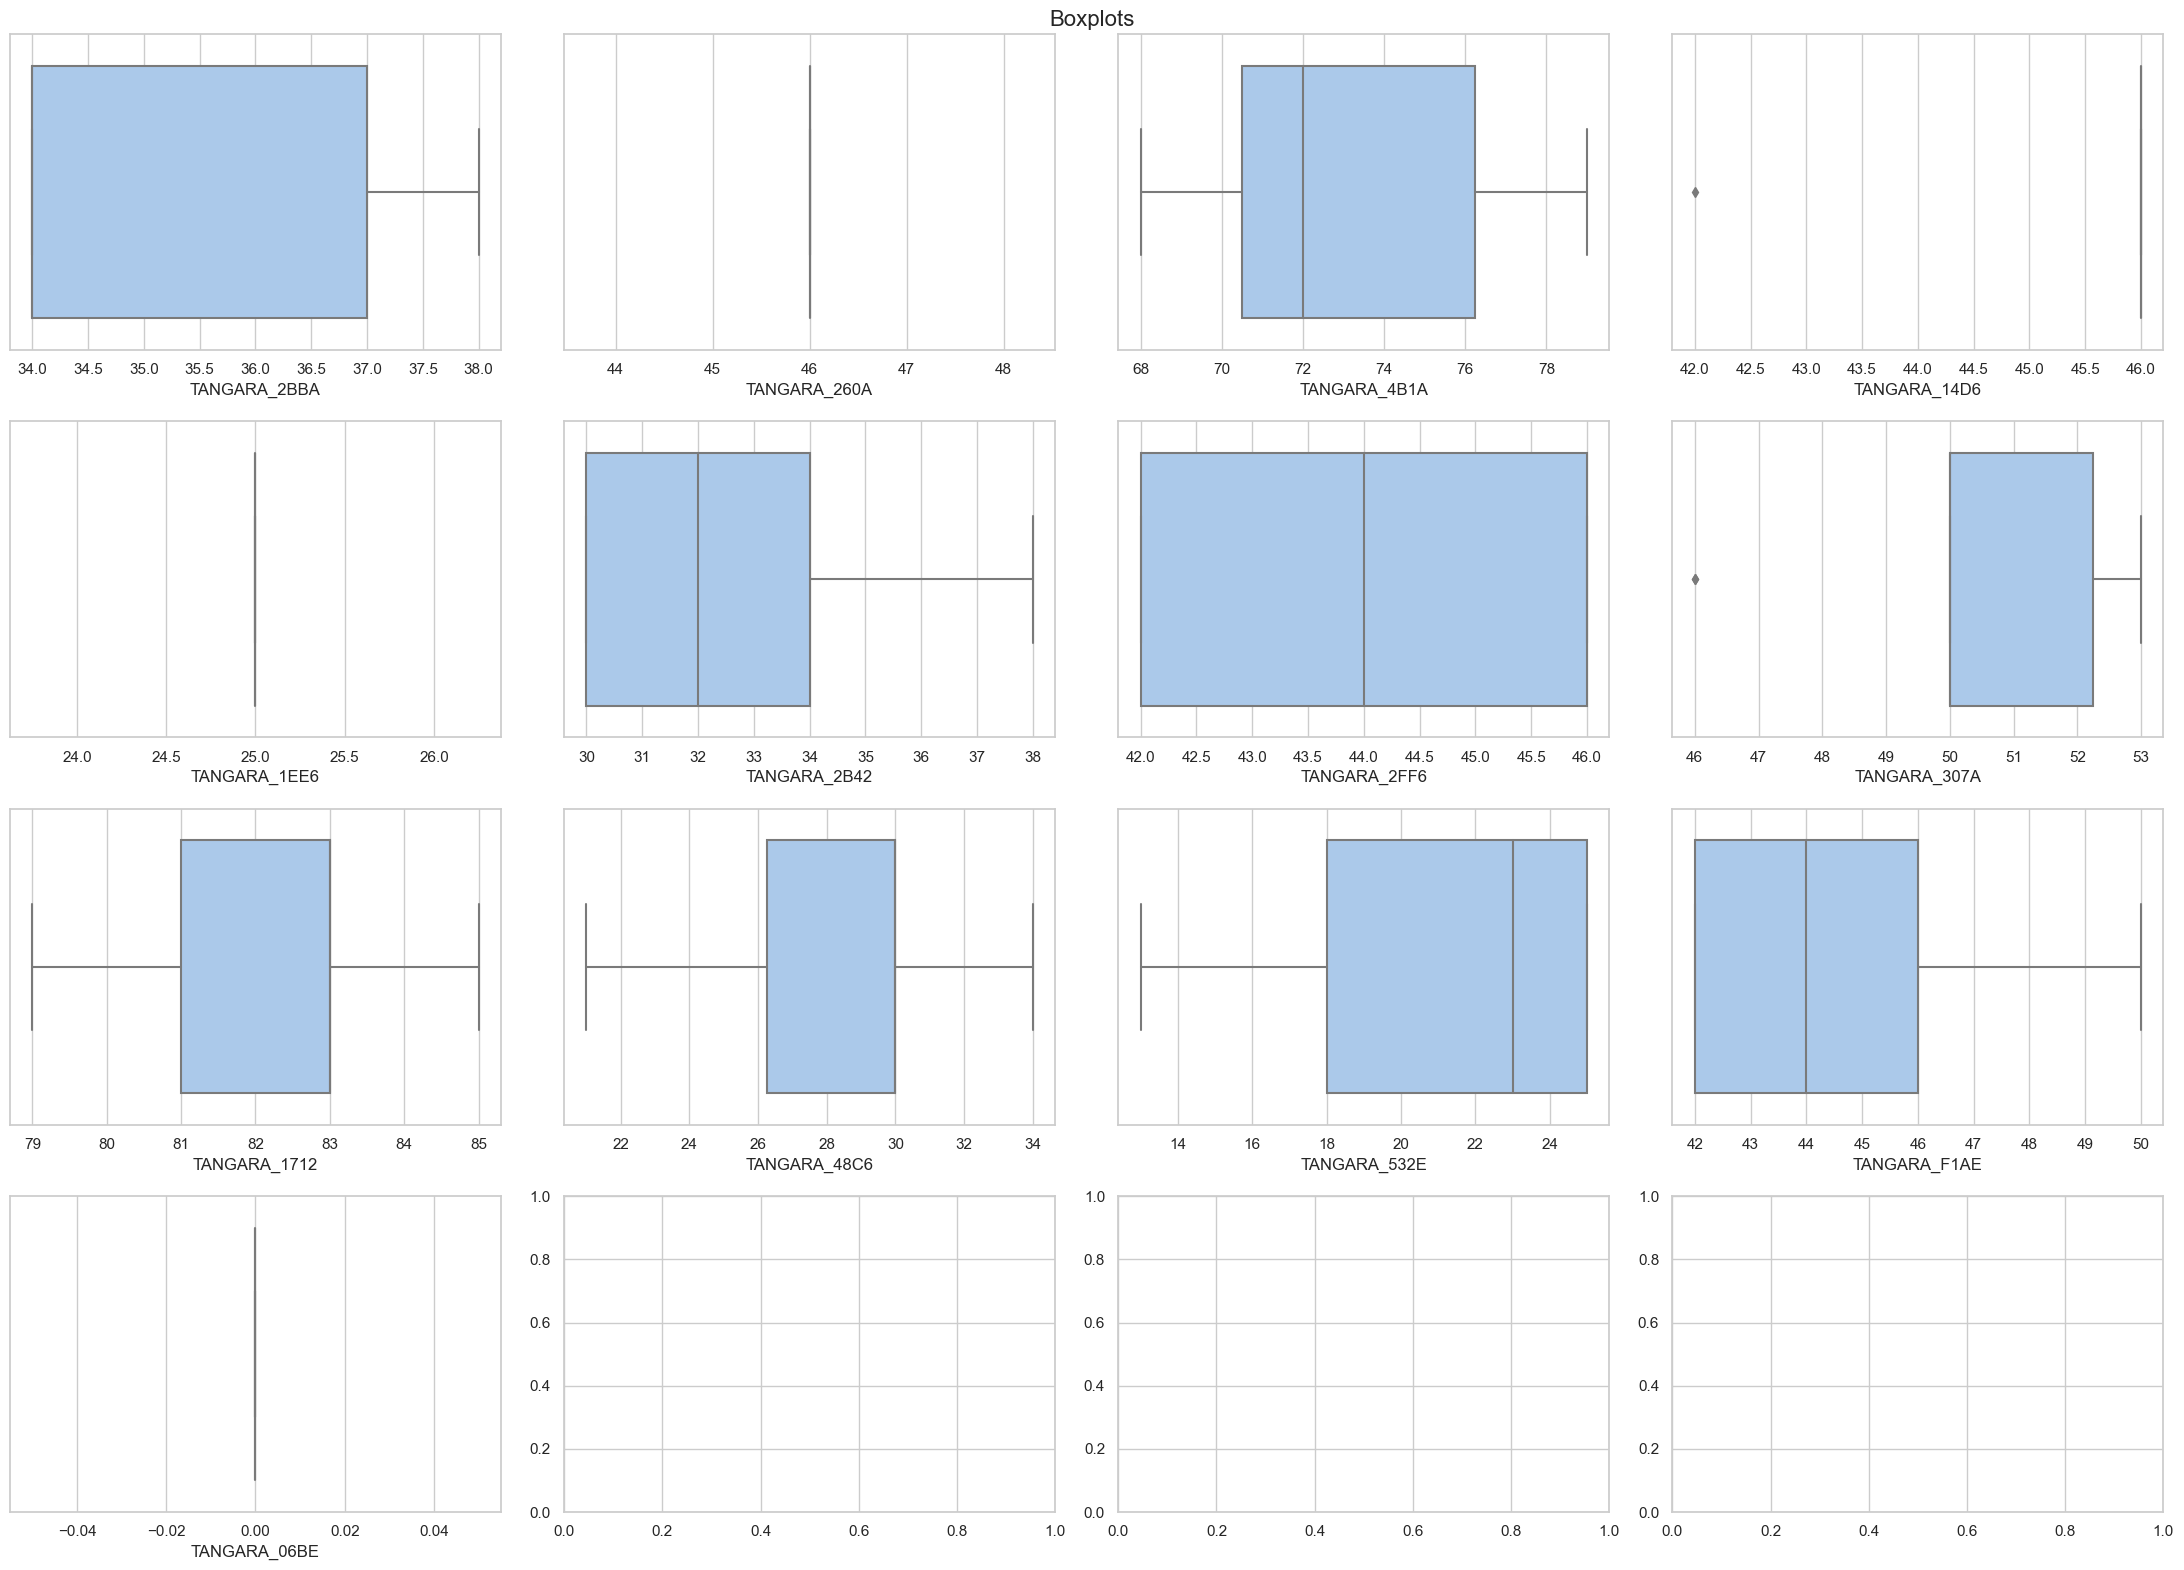

In [7]:
# Plot Boxplots
plot_boxes(df_aqi)

## Lineplots

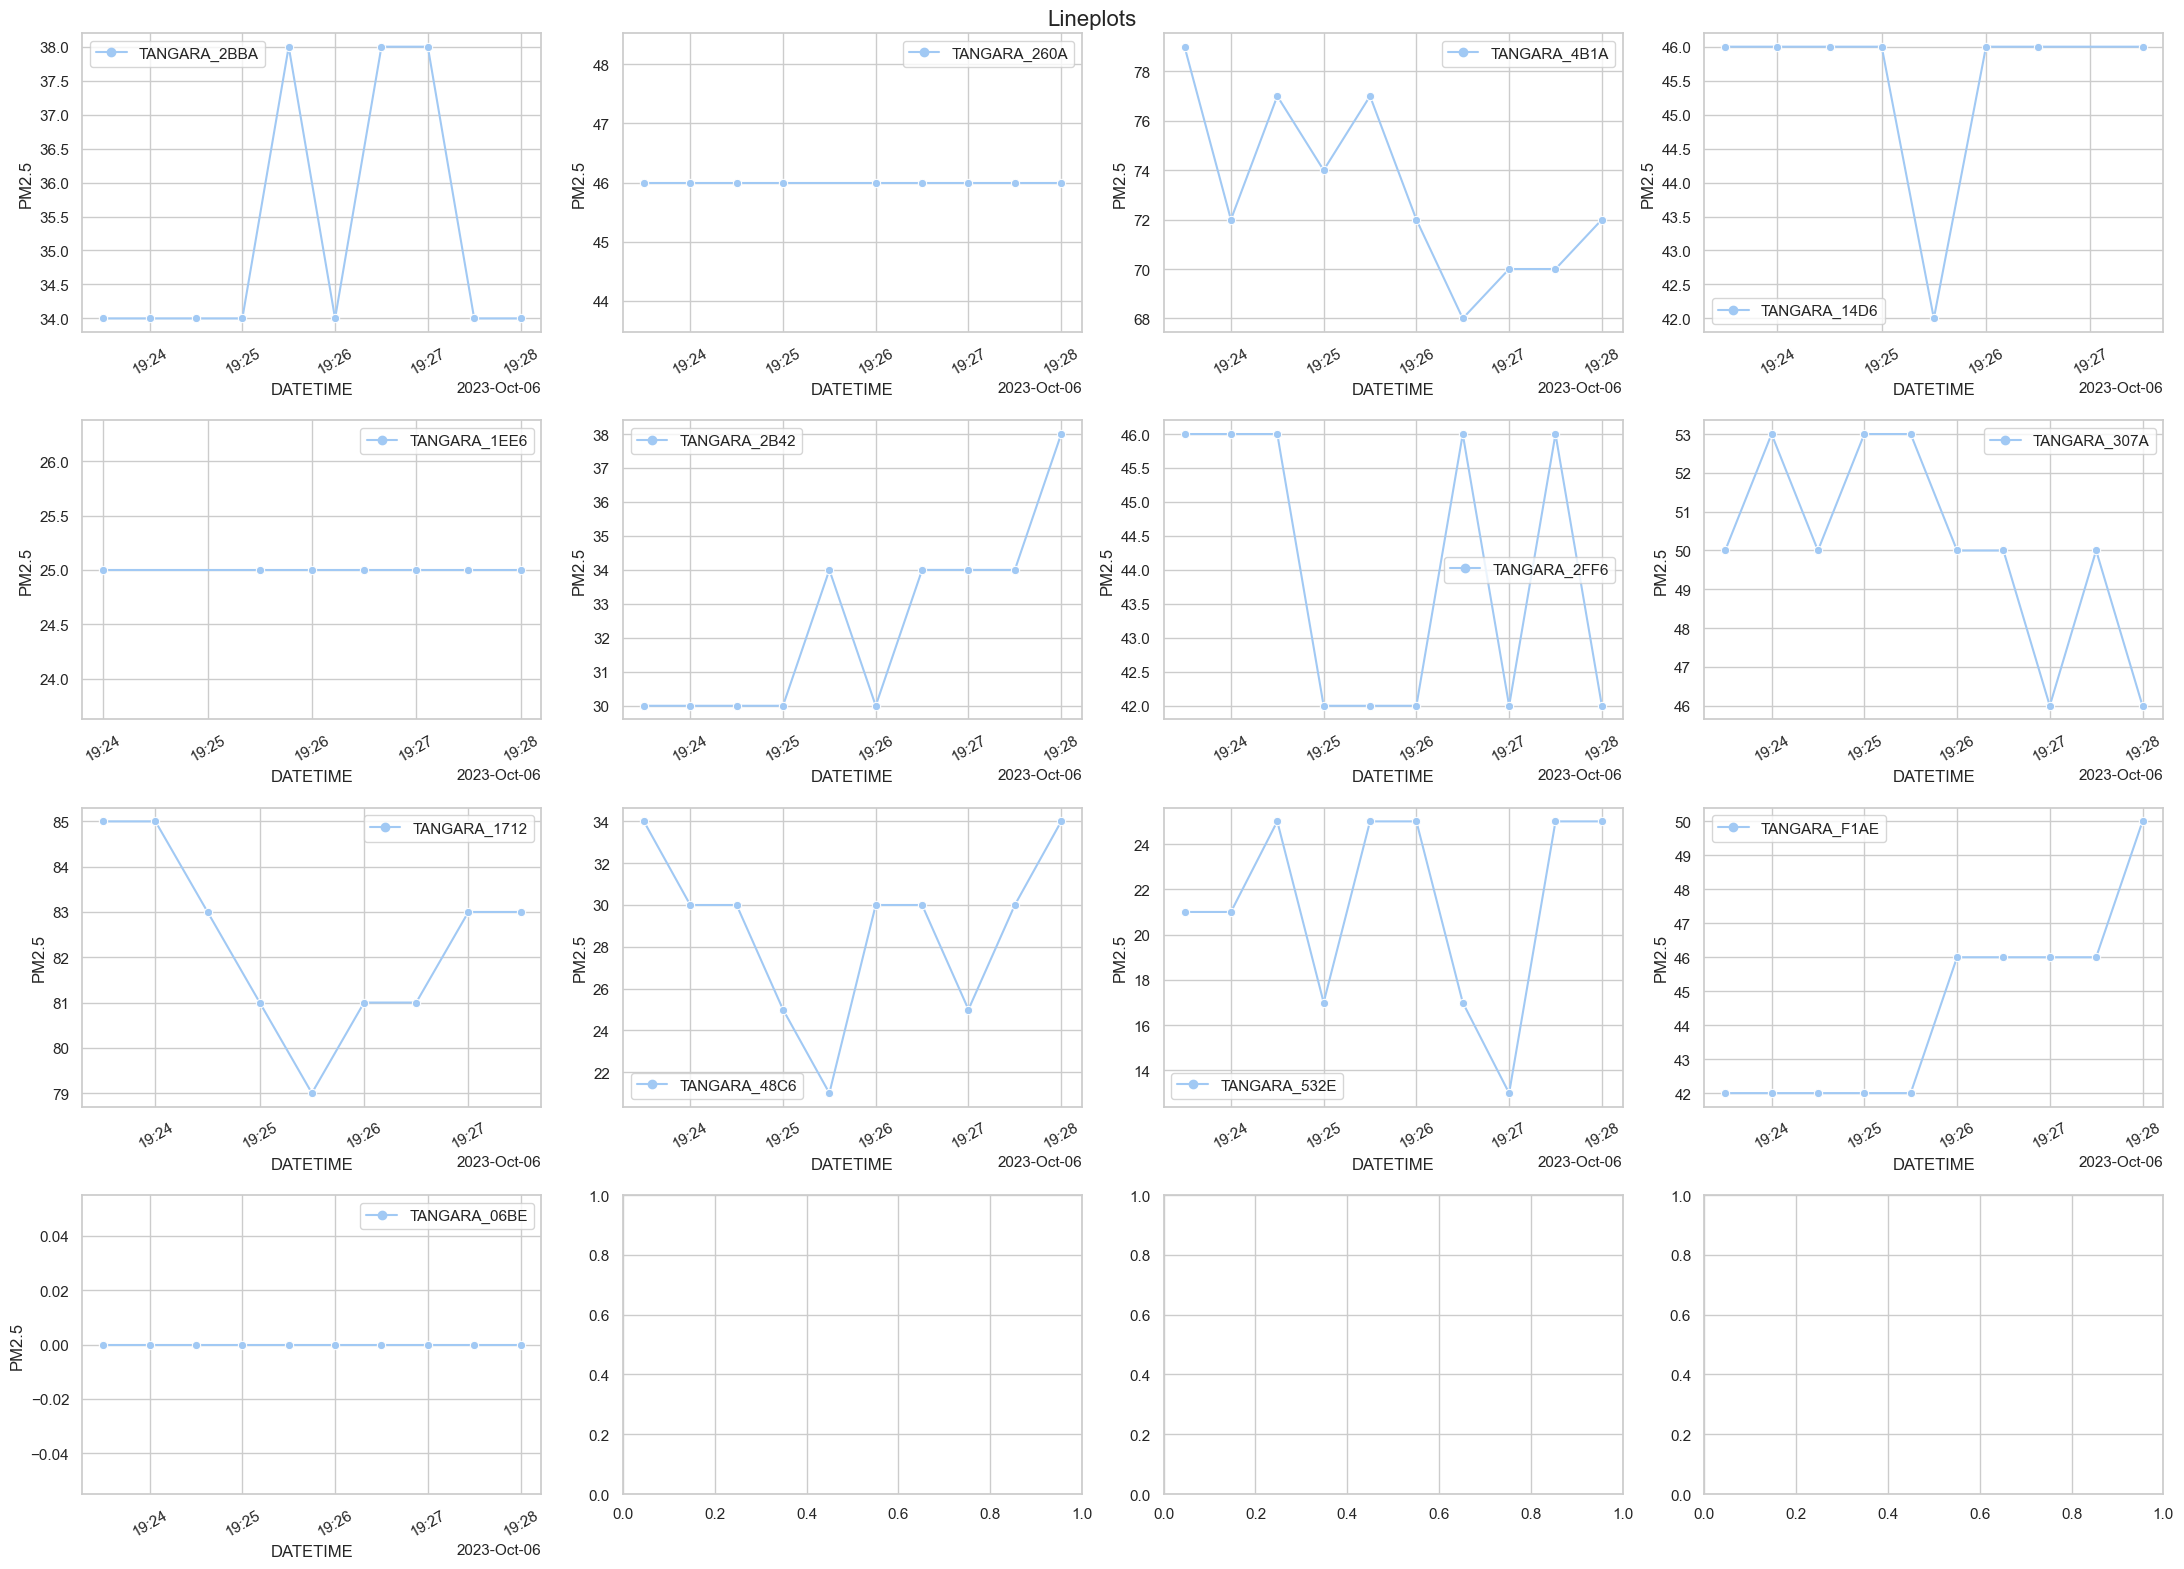

In [8]:
# Plot Lineplots
plot_lines(df_aqi)

In [9]:
# Save AQI Data Frame Sensors into CSV file
df_to_csv(df_aqi, "aqi.csv", datafolder='1_clean')